In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee = pd.read_csv('../Data/final_df.csv')

In [3]:
refugee.head(2)

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.400000,122.81,Republic,19199.0,105090.0,327.0,77.0,23700715.0,308642.0,1.0,49.3,50.7,0.0,36.0
1,Angola,AGO,Africa,15155.0,15537.0,9.157481,25.42,Republic,102643.0,87436.0,1010.0,36.0,258958.0,7172.0,0.0,50.4,49.6,0.0,40.5


# Linear Regression

In [4]:
value = refugee.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

lm = LinearRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)

R2 0.421159112523


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [5]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

# Logistic Regression

In [6]:
#Logisitic Regression looking into Civil War.
value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [7]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.9s


----------------------
Logistic Regression: 0.955538395538
Baseline accuracy: 0.0446927374302


[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished


In [8]:
value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Famine'].values

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s


----------------------
Logistic Regression: 0.921904761905
Baseline accuracy: 0.0782122905028


[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


# ROC Curve

In [9]:
#Logisitic Regression looking into Civil War.
value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

lm = LogisticRegression()
model = lm.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

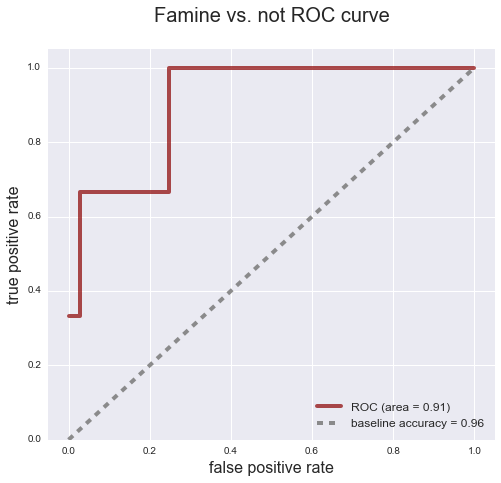

In [11]:
plot_roc(lm, X_test, y_test, 'Famine')

In [12]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee['Civil'].values

lm2 = LogisticRegression()
model = lm2.fit(Xn2, y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y2, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


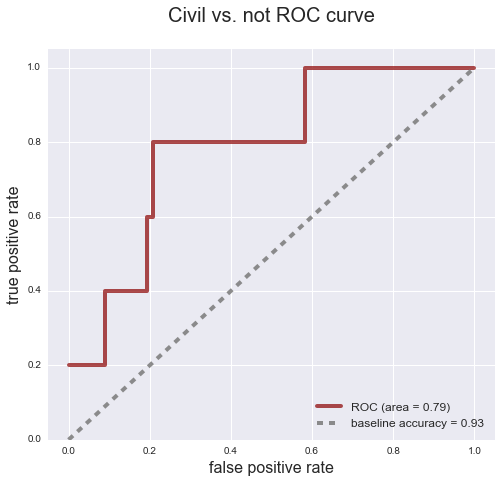

In [13]:
plot_roc(lm2, X_test2, y_test2, 'Civil')

# Precision Recall Curve

In [14]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

In [15]:
def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()


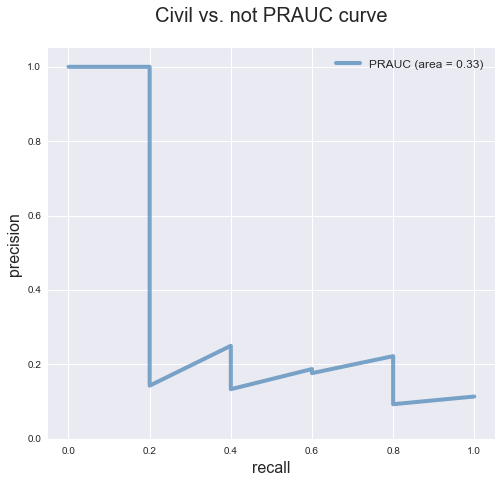

In [16]:
plot_prauc(lm2, X_test2, y_test2, 'Civil')

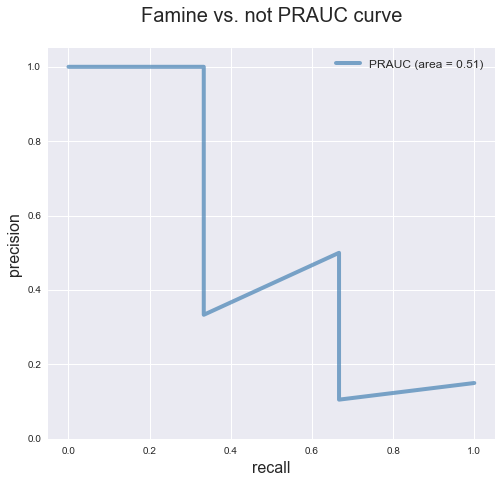

In [17]:
plot_prauc(lm, X_test, y_test, 'Famine')

# Decision Tree

In [18]:
value = refugee.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn2, y2, test_size=0.3)

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier()

## Search parameters
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [19]:
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 'auto', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [20]:
## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_

best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': 2, 'min_samples_split': 30, 'max_depth': None}


best score 0.952


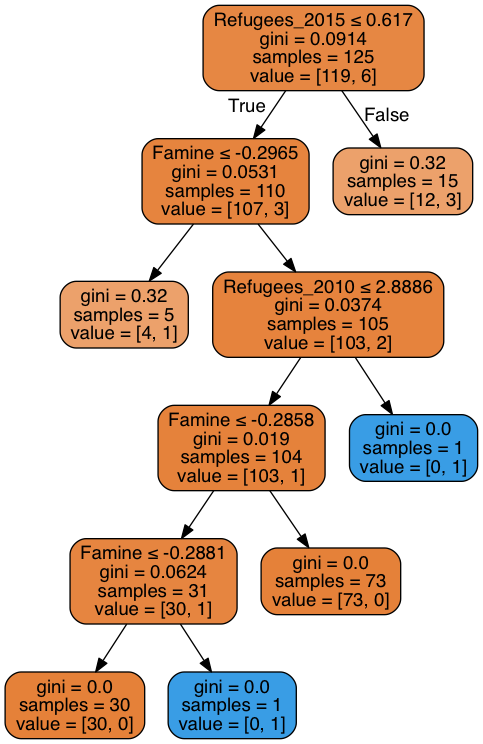

In [21]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# PCA

In [22]:
refugee.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

In [23]:
value = refugee.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Refugees_2015'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X.values)

PCA(copy=True, n_components=6, whiten=False)

In [25]:
pcs = pca.transform(X)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y, cv=5)
print np.mean(pca_scores)

0.421159112526


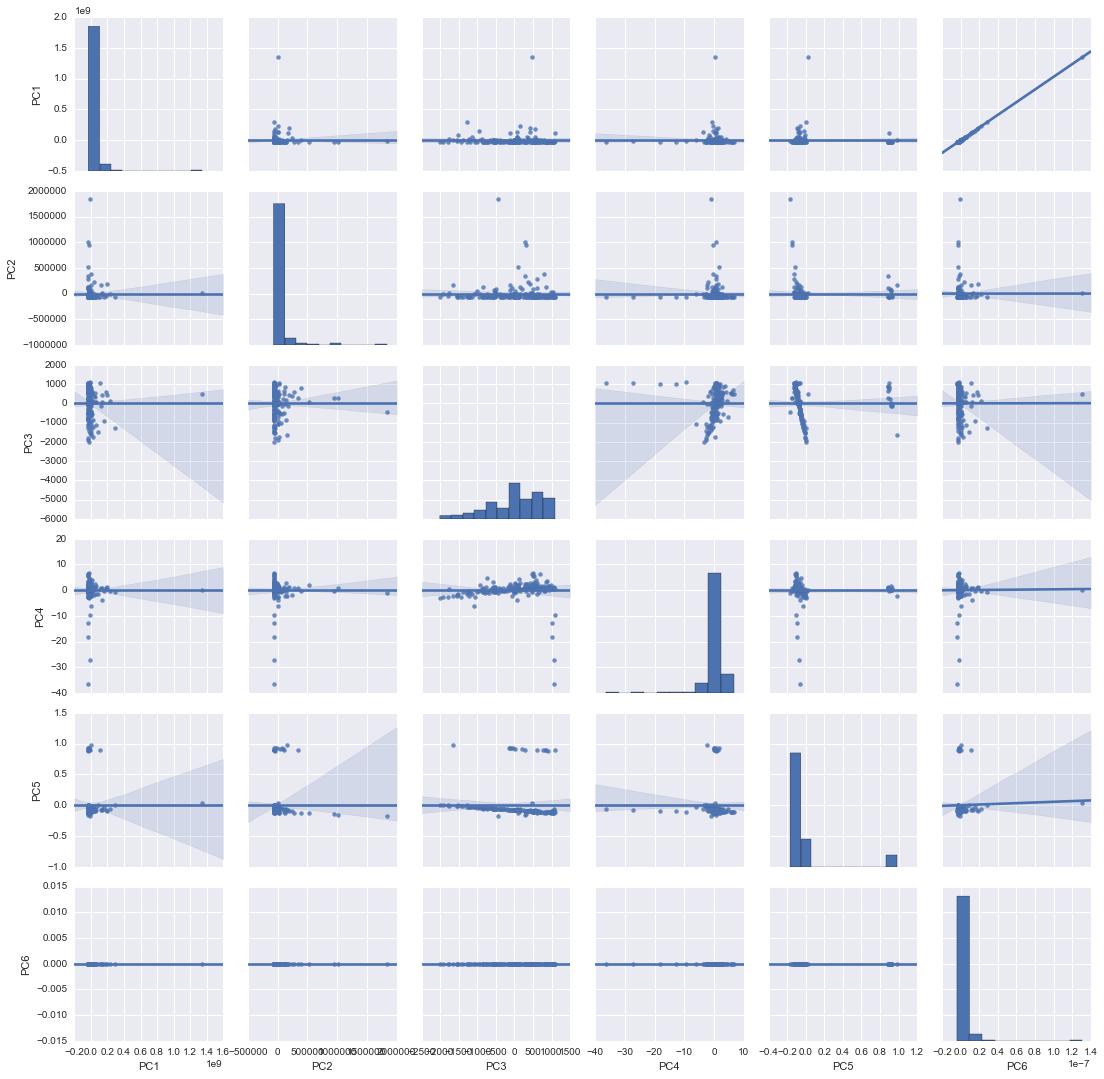

In [26]:
sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')

# Neural Network

In [27]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [28]:
value = refugee.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [29]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(y_train)
test_y_ohe = one_hot_encode_object_array(y_test)

In [30]:
model = Sequential()
model.add(Dense(1000, input_shape=(6,)))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, train_y_ohe, nb_epoch=100, verbose=1);

Epoch 1/100
107/107 [==============================] - 0s - loss: 0.3690 - acc: 0.9626     
Epoch 2/100
107/107 [==============================] - 0s - loss: 0.1230 - acc: 0.9720     
Epoch 3/100
107/107 [==============================] - 0s - loss: 0.1468 - acc: 0.9720     
Epoch 4/100
107/107 [==============================] - 0s - loss: 0.1632 - acc: 0.9720     
Epoch 5/100
107/107 [==============================] - 0s - loss: 0.1674 - acc: 0.9720     
Epoch 6/100
107/107 [==============================] - 0s - loss: 0.1623 - acc: 0.9720     
Epoch 7/100
107/107 [==============================] - 0s - loss: 0.1457 - acc: 0.9720     
Epoch 8/100
107/107 [==============================] - 0s - loss: 0.1314 - acc: 0.9720     
Epoch 9/100
107/107 [==============================] - 0s - loss: 0.1151 - acc: 0.9720     
Epoch 10/100
107/107 [==============================] - 0s - loss: 0.1158 - acc: 0.9720     
Epoch 11/100
107/107 [==============================] - 0s - loss: 0.1202 - acc

In [31]:
loss, accuracy = model.evaluate(X_test, test_y_ohe, verbose=0)
print accuracy

0.930555555556
